<a href="https://colab.research.google.com/github/zzaeyun/ESAA23_1/blob/main/%ED%85%90%EC%84%9C%ED%94%8C%EB%A1%9C_50to86.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**01 딥러닝 준비**
- 텐서플로2: 케라스 API를 내제화
**케라스 API**: 고수준의 딥러닝 라이브러리, GPU 연산을 수행하는 기능을 직접 실행하지 않고 텐서플로, CNTK, Theano, MXNet 등의 백엔드 엔진을 지정하여 사용
- 목적: 딥러닝 라이브러리를 쉽고 간결한 코드로 실행

<br>

###**1-1 주요 용어**
###**1-1-1 하이퍼 파라미터(hyper-parameter)**

하이퍼파라미터: 사용자가 직접 설정해주는 값
- 모델이 훈련하면서 가중치와 편향은 자동 업데이트, 하지만 학습 속도나 반복 훈련 횟수 등은 사용자가 직접 설정

<br>

###**1-1-2 과소적합vs과대적합**
- 머신러닝에서 주어진 훈련 데이터(training set)에서 패턴 학습을 통해 모델 완성
- 하지만 예측할 데이터가 모델이 학습한 데이터와 다른 분포를 갖거나 학습한 데이터가  특정 레이블에 편향된 데이터로 이루어져 있다면 모델이 학습한 후 예측성능이 떨어짐
- 이처럼 모델을 학습시킬 때는 과소적합과 과대적합 문제를 최소화하면서 정확도를 가장 높일 수 있도록 해야 함

<br>

###**1-1-3 에포크**
- 딥러닝은 데이터셋을 학습하는 과정을 여러 번 반복(iteration)하면서 최적의 모델 가중치를 찾는 과정
- 반복 훈련을 할 때 데이터 셋을 전부 학습에 사용하는 1회의 훈련 루프를 1 epoch 에포크 라고 함
- 사전에 설정된 최대 epoch 횟수까지 반복적으로 진행하고 종료

<br>

###**1-1-4 손실함수(loss function)**
- 딥러닝 모델에 적용하는 손실함수는 사용자가 정의해야 함
- 지도 학습의 분류(supervised learning)
  - 이진 분류(binary classification)
    - binary_crossentropy 손실함수
    - 출력층의 활성화 함수가 sigmoid인 경우
  - 다중 분류(multi-class classification)
    - categorical_crossentropy 손실함수
    - 클래스가 원핫 벡터인 경우 사용
    - 활성함수가 softmax
- 회귀 모델
  - MSE 평균제곱오차 (Mean Squared Error)
  - MAE 평균절대값오차 (Mean Absolute Error)
  - Huber 후버
  

In [43]:
import tensorflow as tf

tf.keras.losses.BinaryCrossentropy()

tf.keras.losses.binary_crossentropy

<function keras.losses.binary_crossentropy(y_true, y_pred, from_logits=False, label_smoothing=0.0, axis=-1)>

###**1-1-5 경사하강법(gradient descent)**
- 딥러닝 모델을 훈련할 때, 모델 내부의 가중치에 대한 미분 값을 구하고 목적 함수 값이 낮아지는 방향으로 차감하면서 최소 함수 값을 갖도록 하는 방법
- 경사하강법 알고리즘을 적용하여 손실함수 값을 최소로 만드는 가중치를 찾을 수 있음


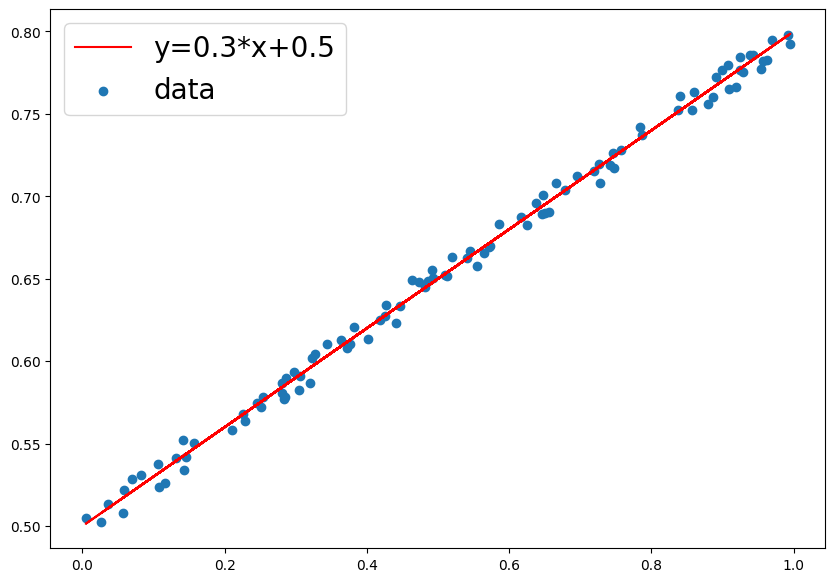

w:0.3, b:0.5


In [44]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 

def make_linear(w=0.5, b=0.8, size=50, noise=1.0):
  x=np.random.rand(size)
  y=w*x+b
  noise=np.random.uniform(-abs(noise), abs(noise), size=y.shape)
  yy=y+noise
  
  plt.figure(figsize=(10,7))
  plt.plot(x, y, color='r', label=f'y={w}*x+{b}')
  plt.scatter(x, yy, label='data')
  plt.legend(fontsize=20)
  plt.show()
  print(f'w:{w}, b:{b}')
  return x, yy

x,y=make_linear(w=0.3, b=0.5, size=100, noise=0.01)

- 생성된 y 데이터에는 회귀선과 완벽히 일치하지 않고 약간의 노이즈가 추가

<br>

손실함수를 w,b에 대한 각각의 편미분 값을 구한 뒤 학습률 계수를 곱하여 이전 w,b로부터 차감

<br>

- 넘파이로 최적화하는 과정을 구현
- 최대 반복 횟수를 지정하고 오차가 0.005 이내로 수렴하면 반복문 종료
- 반복문 안에서 손실함수를 정의하고 매 epoch마다 w,b에 대한 가중치 업데이트

In [45]:
num_epoch=1000

learning_rate=0.005

errors=[]

w=np.random.uniform(low=0.0, high=1.0)
b=np.random.uniform(low=0.0, high=1.0)

for epoch in range(num_epoch):
  y_hat=w*x+b
  error=0.5*((y_hat-y)**2).sum()
  if error < 0.005:
    break
  w=w-learning_rate*((y_hat-y)*x).sum()
  b=b-learning_rate*(y_hat-y).sum()

  errors.append(error)

  if epoch%5==0:
    print('{0:2}w={1:.5f}.b={2:.5f} error={3:.5f}'.format(epoch,w,b,error))

print('-----'*15)
print('{0:2}w={1:.1f}.b={2:.1f} error={3:.5f}'.format(epoch,w,b,error))

 0w=0.63212.b=0.30193 error=0.56863
 5w=0.58731.b=0.33945 error=0.36770
10w=0.54465.b=0.36334 error=0.26712
15w=0.50828.b=0.38363 error=0.19417
20w=0.47731.b=0.40092 error=0.14126
25w=0.45094.b=0.41564 error=0.10288
30w=0.42848.b=0.42818 error=0.07504
35w=0.40935.b=0.43886 error=0.05485
40w=0.39305.b=0.44795 error=0.04021
45w=0.37918.b=0.45570 error=0.02958
50w=0.36736.b=0.46229 error=0.02188
55w=0.35730.b=0.46791 error=0.01629
60w=0.34872.b=0.47269 error=0.01224
65w=0.34142.b=0.47677 error=0.00929
70w=0.33521.b=0.48024 error=0.00716
75w=0.32991.b=0.48320 error=0.00562
---------------------------------------------------------------------------
78w=0.3.b=0.5 error=0.00490


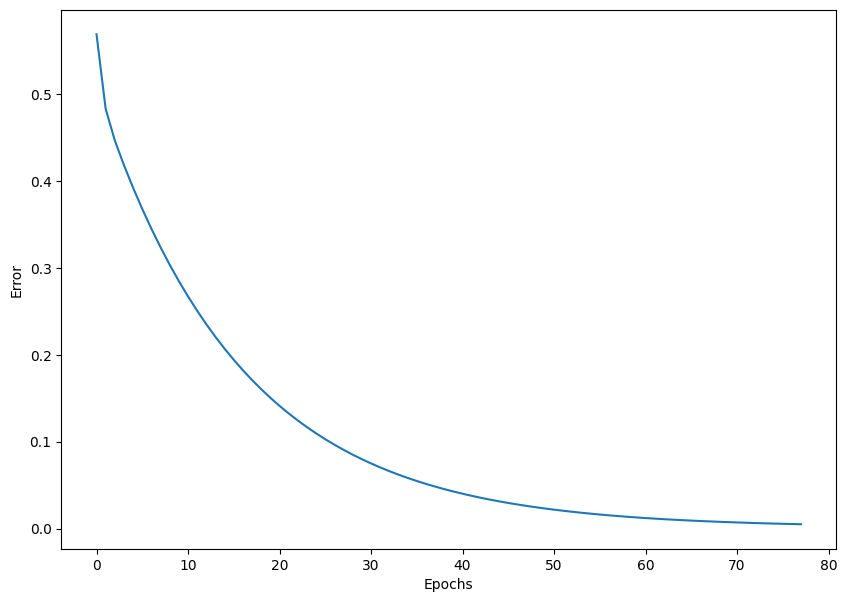

In [46]:
plt.figure(figsize=(10,7))
plt.plot(errors)
plt.xlabel('Epochs')
plt.ylabel('Error')
plt.show()

 - 가중치가 난수 값에 의하여 다르게 초기화되기 때문에 실행할 때마다 수렴하는 속도는 차이가 있다
 - w,b 계수를 확인하면 샘플 데이터셋을 생성할 때 설정한 w,b 계수와 비슷한 값임을 확인

###**1-2 딥러닝 프로세스**


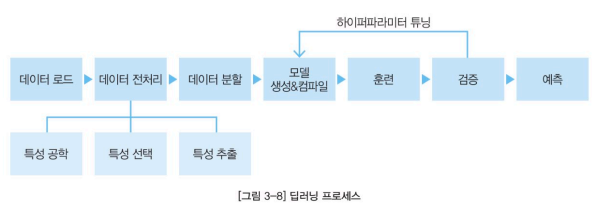

###**1-2-1 데이터 전처리**

- 데이터를 가공하는 단계
- 데이터셋의 종류와 적용하려는 문제 유혀엥 따라 전처리 방법은 다양
- 배열의 차원을 변경하거나 스케일을 조정할 수 있음

<br>

###**1-2-2 모델 생성**
- 모델의 구조를 정의하고 생성하는 단계
1. 순차적인 구조의 모델: Sequential API로 구현
2. 다중 입력 및 출력을 가지고 복잡한 구조를 갖는 모델
  - Functional API
  - Model Subclassing

<br>

###**1-2-3 모델 컴파일**
- 모델의 구조를 정의하고 생성한 뒤 모델 훈련에 사용할 손실함수(loss), 옵티마이저(optimizer), 평가지표(metrics) 등을 정의
- 모델 인스턴스에 compile()메소드를 적용하고 여러가지 속성 값을 설정

<br>

###**1-2-4 모델 훈련**
- fit()함수에 모델 훈련에 필요한 정보를 매개변수(파라미터)로 전달
- 훈련 데이터셋, 검증 데이터셋, epoch, 배치(batch)크기 및 콜백 함수 등

<br>

###**1-2-5 모델 검증**
- 훈련이 완료된 모델을 검증
- 훈련할 때 사용하지 않은 검증 데이터셋을 모델에 입력하고 모델의 예측값을 정답과 비교하여 평가지표를 꼐산
- 반환한 검증 결과를 토대로 잠재적인 모델의 성능 평가가 이루어짐
-  검증 결과를 바탕으로 다시 모델 생성 단계로 돌아가 모델을 수정하고 훈련과정을 거쳐 재평가하는 단계를 통해 목표 성능에 도달

<br>

###**1-2-6 모델 예측**

##**02 단순 신경망 훈련**
###**2-1 선형 회귀**
- 회귀 분석: 하나 이상의 독립변수들이 종속변수에 미치는 영향을 추정하는 토계 기법
  - 단순선형회귀: 하나의 X가 Y에 미치는 영향을 추정, 1차 함수 관계
텐서플로 케라스를 활용하여 단순선형회귀 모델을 직접 만들고 딥러닝 학습
- 모델은 1차 함수식과 동일
- 기울기a와 절편b를 업데이트하면서 종속변수 Y에 가장 근사한 1차 함수식을 완성

<br>

###**2-2 뉴런(Neuron)**
뉴런: 인공 신경망을 구성하는 하나의 신경
- 뉴런은 노드(node)라고도 불림
- 신경망은 여러 개의 레이어를 가지며 1개의 레이어는 1개 이상의 뉴런으로 구성
- 뉴런 내부에는 가중치가 존재하고 모델이 훈련을 진행하면서 오차 역전파를 통해 뉴런의 가중치 업데이트

<br>

###**2-3 Dense 레이어**
- Dense 레이어는 심층 신경망 모델을 구성하는 가장 기본 레이어
- 레이어와 레이어 사이에 모든 뉴런이 서로 연결되어 있기 때문에, 완전 연결층(Fully Connected Layer)이라고 부르기도 함


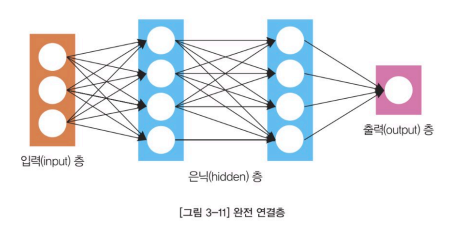

그림 3-11
- 4개의 Dense 레이어로 구성된 모델
- 입력 레이어 1개, 은닉 레이어 2개, 출력 레이어 1개로 구성
- 각 레이어는 1개 이상의 뉴런으로 구성
- 모든 뉴런들이 정보(텐서)의 흐름을 나타내는 화살표로 연결되어 있으므로 완전 연결층이라고 정의

<br>

- Dense 레이어를 구성하는 노드 개수와 활성화 함수를 지정
- 텐서플로의 layer 모듈에 있는 Dense 레이어로 쉽게 구현
  - 노드의 개수를 Dense 레이어의 첫번째 위치 인자로 지정
  - 또한 activation 매개변수에 활성화 함수를 지정하여 적용할 수 있음
  

In [47]:
import tensorflow as tf

#10개의 노드로 이루어진 Dense 레이어
tf.keras.layers.Dense(10)

#ReLU 활성화 함수 적용
tf.keras.layers.Dense(10, activation='relu')

###**2-4 데이터셋 만들기**
- 단순선형회귀 모형을 지도학습 방식으로 훈련하기 위해서 x, y 데이터를 생성
- arange() 메소드를 활용하여 5개의 순차적인 x 데이터를 생성하고, 임의의 1차 함수 관계식에 대입하여 y데이터 생성

In [48]:
x=np.arange(1,6)
y=3*x+2
print(x)
print(y)

[1 2 3 4 5]
[ 5  8 11 14 17]


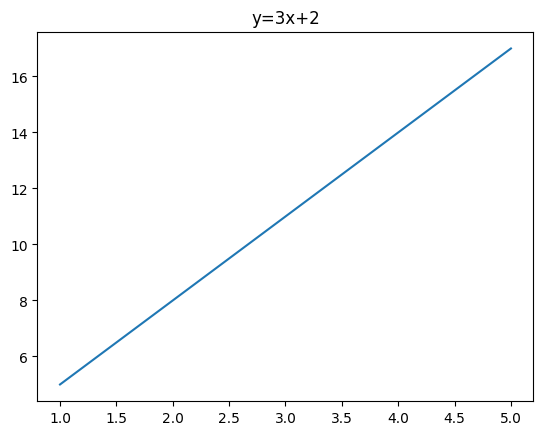

In [49]:
import matplotlib.pyplot as plt

plt.plot(x,y)
plt.title('y=3x+2')
plt.show()

### **2-5 Sequential API**
케라스의 Sequential API
- 매우 간결하게 딥러닝 모델 생성
- 층을 이어 붙이듯 시퀀스에 맞게 일렬로 연결하는 방식
- 입력 레이어부터 출력 레이어까지 순서를 갖게 됨

<br>

- 2개 이상의 다중 입력이나 다중 출력을 갖는 복잡한 구조를 만들 수 없음
  - Functional API 사용

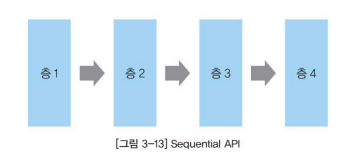

### **2-5-1 모델 구조**

Sequential API 모델 생성 방법
1. 리스트형 정의로 Sequential 클래스 함수에 파이썬 리스트 형태 여러 개의 층을 입력
- 앞에 위치한 층부터 연산을 먼저 처리하고 순차적으로 수행
2. add 함수로 레이어 추가
- Sequential 클래스 객체를 만든 뒤, 생성된 모델 인스턴스에 층을 추가


In [50]:
#1
import tensorflow as tf

model=tf.keras.Sequential([
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(5),
    tf.keras.layers.Dense(1)
])

In [51]:
#2
model=tf.keras.Sequential()
model.add(tf.keras.layers.Dense(10))
model.add(tf.keras.layers.Dense(5))
model.add(tf.keras.layers.Dense(1))

###**2-5-2 입력 데이터 형태**
Sequential API를 사용하여 모델을 구성할 때 반드시 첫 번째 층은 input_shape 매개변수를 지정해야 함
- input_shape: 주입할 데이터셋의 shape을 튜플 혹은 리스트 형태로 지정

In [52]:
import tensorflow as tf

model=tf.keras.Sequential([
    tf.keras.layers.Dense(10, input_shape=[4]),
    tf.keras.layers.Dense(5),
    tf.keras.layers.Dense(1)
])

## **2-5-3 단순선형회귀 모델 정의**
- 단순선형회귀 모델을 만들기 위해서는 1개의 뉴런을 가지는 Dense 레이어 한 개를 사용
- 1차 함수식에서 입력 데이터는 x값 1개만 존재하므로 input_shape=[1]

In [53]:
model=tf.keras.Sequential([
    tf.keras.layers.Dense(1, input_shape=[1])
])

### **2-6 모델 요약**

 model.summary()로 모델의 요약을 확인
 - Total params: 모델 내부에 존재하는 모든 파라미터 합계
 - Trainable params: 모델 훈련 시 업데이터할 파라미터 총 개수
 - Non-trainable params: 훈련 시 업데이트하지 않을 파라미터의 총 개수

In [54]:
model.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_28 (Dense)            (None, 1)                 2         
                                                                 
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


### **2-7 컴파일**
- 모델의 훈련 과정에서 적용할 옵티마이저, 손실함수, 평가지표 정의
- 지정 방법
1. 클래스 인스턴스
2. 함수
3. 사전 정의된 문자열

<br>

클래스 인스턴스
- 학습률, 모멘덤(momentum) 등의 하이퍼파라미터를 사용자가 직접 지정
- 하지만 문자열로 지정하는 경우 기본값으로 설정된 하이퍼 파라미터 사용
- 하이퍼 파라미터 수정이 어려움

In [55]:
model.compile(optimizer='sgd', loss='mean_squared_error',
              metrics=['mean_squared_error','mean_absolute_error'])

In [56]:
model.compile(optimizer='sgd', loss='mean_squared_error',
              metrics=['mse', 'mae'])

In [57]:
model.compile(optimizer=tf.keras.optimizers.SGD(lr=0.005), 
              loss=tf.keras.losses.MeanAbsoluteError(), 
              metrics=[tf.keras.metrics.MeanAbsoluteError(), 
                       tf.keras.metrics.MeanSquaredError()
                       ])

In [58]:
model.compile(optimizer='sgd', loss='mse', metrics=['mae'])

### **2-8 훈련**
- fit() 메소드적용

In [59]:
model.fit(x,y,epochs=5)

Epoch 1/5
1/1 [==============================] - 1s 506ms/step - loss: 265.1453 - mae: 15.0722
Epoch 2/5
1/1 [==============================] - 0s 15ms/step - loss: 154.5541 - mae: 11.5349
Epoch 3/5
1/1 [==============================] - 0s 13ms/step - loss: 90.1067 - mae: 8.8344
Epoch 4/5
1/1 [==============================] - 0s 15ms/step - loss: 52.5497 - mae: 6.7729
Epoch 5/5
1/1 [==============================] - 0s 13ms/step - loss: 30.6631 - mae: 5.1990


- epoch 당 loss 값이 감소
- 반복 훈련 횟수가 충분하지 않아 과소 적합

<br>

- epoch에 1200 지정
- 모델 인스턴스를 새로 생성하고 컴파일


In [60]:
model=tf.keras.Sequential([
    tf.keras.layers.Dense(1,input_shape=[1])
])

model.compile(optimizer='sgd', loss='mse', metrics=['mae'])

history=model.fit(x,y,epochs=1200)

Epoch 1/1200
1/1 [==============================] - 0s 478ms/step - loss: 72.0001 - mae: 8.0000
Epoch 2/1200
1/1 [==============================] - 0s 13ms/step - loss: 42.0929 - mae: 6.1600
Epoch 3/1200
1/1 [==============================] - 0s 17ms/step - loss: 24.6635 - mae: 4.7552
Epoch 4/1200
1/1 [==============================] - 0s 16ms/step - loss: 14.5056 - mae: 3.6826
Epoch 5/1200
1/1 [==============================] - 0s 18ms/step - loss: 8.5852 - mae: 2.8637
Epoch 6/1200
1/1 [==============================] - 0s 16ms/step - loss: 5.1342 - mae: 2.2383
Epoch 7/1200
1/1 [==============================] - 0s 18ms/step - loss: 3.1222 - mae: 1.7607
Epoch 8/1200
1/1 [==============================] - 0s 16ms/step - loss: 1.9489 - mae: 1.3960
Epoch 9/1200
1/1 [==============================] - 0s 12ms/step - loss: 1.2642 - mae: 1.1174
Epoch 10/1200
1/1 [==============================] - 0s 13ms/step - loss: 0.8644 - mae: 0.9045
Epoch 11/1200
1/1 [==============================] - 0

mse, mae 모두 개선

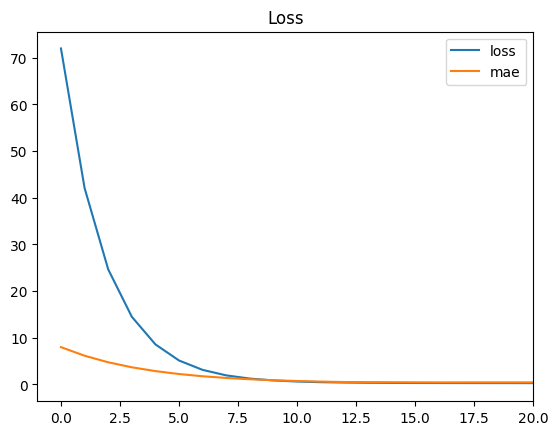

In [61]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['mae'], label='mae')
plt.xlim(-1,20)
plt.title('Loss')
plt.legend()
plt.show()

### **2-9 검증**
- evaluate() 메소드

In [62]:
model.evaluate(x,y)

1/1 [==============================] - 0s 273ms/step - loss: 9.6885e-05 - mae: 0.0084


[9.68845997704193e-05, 0.008448505774140358]

### **2-10 예측**
- predict() 메솓,

In [63]:
model.predict([10])

1/1 [==============================] - 0s 121ms/step


array([[32.040833]], dtype=float32)

##**03 심층 신경망으로 이미지 분류**
###**3-1 케라스 내장 데이터셋 로드**
tensorflow.keras.datasets 서브패키지
- boston_housing: 보스톤 주택 가격 데이터셋
- cifar10: CIFAR10 이미지 분류 데이터셋
- cifar100
- mnist: 손글씨 데이터셋
- fashion_mnist: 의류 데이터셋
- imdb: IMDb 영화 데이터셋
- reuters: 뉴스 토픽


In [64]:
import tensorflow as tf

mnist=tf.keras.datasets.mnist

mnist 변수에 load_data 메소드 적용
- 넘파이 배열로 구성된 데이터셋 다운

In [65]:
(x_train,y_train),(x_test,y_test)=mnist.load_data()

shape의 첫번째 데이터셋의 크기: 이미지의 세로, 가로 픽셀 크기

In [66]:
print('train set:', x_train.shape, y_train.shape)
print('test set:', x_test.shape, y_test.shape)

train set: (60000, 28, 28) (60000,)
test set: (10000, 28, 28) (10000,)


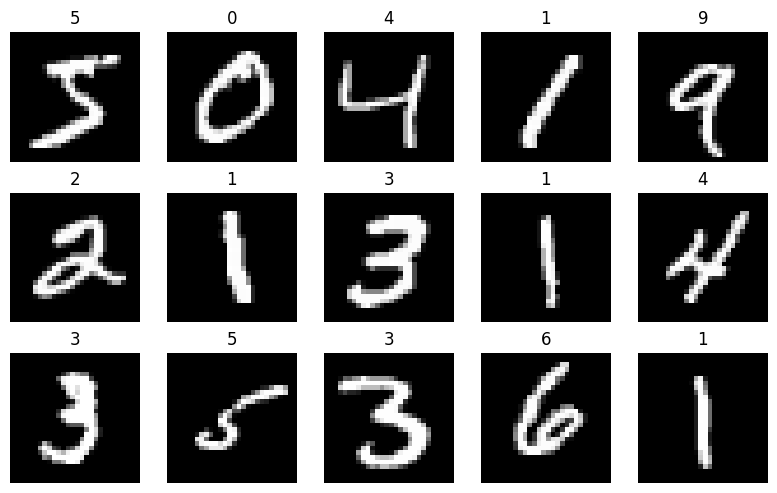

In [67]:
import matplotlib.pyplot as plt

fig, axes=plt.subplots(3,5)
fig.set_size_inches(8,5)

for i in range(15):
  ax=axes[i//5, i%5]
  ax.imshow(x_train[i], cmap='gray')
  ax.axis('off')
  ax.set_title(str(y_train[i]))

plt.tight_layout()
plt.show()

### **3-2 데이터 전처리**

In [68]:
x_train[0,10:15,10:15]

array([[  1, 154, 253,  90,   0],
       [  0, 139, 253, 190,   2],
       [  0,  11, 190, 253,  70],
       [  0,   0,  35, 241, 225],
       [  0,   0,   0,  81, 240]], dtype=uint8)

In [69]:
#픽셀값 최소/대값 확인 후 정규화

print(f'정규화 전] 최소값:{x_train.min()}, 정규화 전] 최소값:{x_train.max()}')

정규화 전] 최소값:0, 정규화 전] 최소값:255


In [70]:
x_train=x_train/x_train.max()

In [71]:
print(f'정규화 후] 최소값:{x_train.min()}, 정규화 후] 최소값:{x_train.max()}')

정규화 후] 최소값:0.0, 정규화 후] 최소값:1.0


In [72]:
x_test=x_test/x_test.max()

In [73]:
x_train[0, 10:15, 10:15]

array([[0.00392157, 0.60392157, 0.99215686, 0.35294118, 0.        ],
       [0.        , 0.54509804, 0.99215686, 0.74509804, 0.00784314],
       [0.        , 0.04313725, 0.74509804, 0.99215686, 0.2745098 ],
       [0.        , 0.        , 0.1372549 , 0.94509804, 0.88235294],
       [0.        , 0.        , 0.        , 0.31764706, 0.94117647]])

### **3-3 Flatten 레이어**
- 정규화를 하더라도 개별 데이터 값의 범위는 축소 되지만 원본 배열의 형태는 그대로 유지
- Dense 레이어에는 입력값으로 1차원 배열이 들어가야 하므로 이미지 데이터를 1차원으로 전처리하여 주입

In [74]:
print(f'변경 전 shape: {x_train.shape}')
print(f'ID으로 shape 변경 후: {x_train.reshape(60000,-1).shape}')

변경 전 shape: (60000, 28, 28)
ID으로 shape 변경 후: (60000, 784)


In [75]:
print(f'변경 전 shape: {x_train.shape}')
print(f'ID으로 shape 변경 후: {tf.keras.layers.Flatten()(x_train).shape}')

변경 전 shape: (60000, 28, 28)
ID으로 shape 변경 후: (60000, 784)


### **3-4 활성화 함수**
활성화 함수(Activation Function)
- 입력을 비선형 출력으로 변환해주는 함수
- 선형관계를 나타내느 함수에 비선형성을 추가하는 방법
- 비선형성을 추가하지 않고 선형 함수로만 층을 구성한다면 모델을 깊게 구성하더라도 결국 선형함수로 표현

<br>

자주 활용되는 활성화 함수
- 시그모이드
- 하이퍼볼릭 탄젠트
- ReLU
- Leaky ReLU


In [76]:
tf.keras.layers.Dense(128,activation='relu')

In [77]:
#별도의 층에 적용
model=tf.keras.Sequential([
    tf.keras.layers.Dense(128),
    tf.keras.layers.Activation('relu')
])

## **3-5 입력과 출력**
- 딥러닝 모델을 만들 때는 첫 번째 레잉어에 입력 데이터의 형태를 나타내는 input_shape 매개변수를 지정하는 것이 일반적
- (60000, 28, 28): 이미지의 세로 가로를 나타내는 input_shape=(28, 28)를 지정
- 분류 모델의 가장 마지막 레이어는 출력층으로 반드시 분류해야할 클래스의 개수와 동일
  - mnist는 0~9까지 10개의 클래스로 이루어져 있으므로 마지막 출력층의 노드 개수는 10개 

In [78]:
model=tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(256,activation='relu'),
    tf.keras.layers.Dense(64,activation='relu'),
    tf.keras.layers.Dense(32,activation='relu'),
    tf.keras.layers.Dense(10,activation='softmax')
    #출력층의 노드 개수가 2개 이상인 경우 softmax 사용
])

In [79]:
#출력층 노드=1
tf.keras.layers.Dense(1,activation='sigmoid')

#출력층의 노드 개수가 2개 이상인 경우 softmax 사용
tf.keras.layers.Dense(2,activation='softmax')

### **3-6 손실함수**

- 이진 분류기: 출력층 노드=1 --> activation='sigmoid', loss 손실함수는 'binary_crossentropy'

In [80]:
model.compile(loss='binary_crossentropy')

- 출력층 노드 개수 2개 이상: activation='softmax', 손실함수는 'categorical_crossentropy' 또는 'sparse_categorical_crossentropy'
  - 출력 데이터가 원핫 벡터: 'categorical_crossentropy'
  - 아니면 : 'sparse_categorical_crossentropy'

In [81]:
model.compile(loss='categorical_crossentropy')

model.compile(loss='sparse_categorical_crossentropy')

### **3-7 옵티마이저**
옵티마이저: 손실을 낮추기 위해서 신경망의 속성을 변경하는 데 사용되는 최적화 방법

<br>

케라스에서 지원하는 옵티마이저 목록
- SGD
- Adam
- Adagrad
- Nadam
- RMSprop
- Adadelta
- Adamax
- Ftrl

In [82]:
adam=tf.keras.optimizers.Adam(lr=0.001)
model.compile(optimizer=adam)

model.compile(optimizer='adam')

### **3-8 평가지표**

In [83]:
acc=tf.keras.metrics.SparseCategoricalAccuracy()

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=[acc])

In [84]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

###**3-9 훈련**

In [85]:
model.fit(x_train,y_train,
          validation_data=(x_test,y_test),
          epochs=10)

Epoch 1/10
1875/1875 [==============================] - 20s 10ms/step - loss: 0.2285 - accuracy: 0.9310 - val_loss: 0.1079 - val_accuracy: 0.9651
Epoch 2/10
1875/1875 [==============================] - 15s 8ms/step - loss: 0.0913 - accuracy: 0.9726 - val_loss: 0.0909 - val_accuracy: 0.9702
Epoch 3/10
1875/1875 [==============================] - 15s 8ms/step - loss: 0.0636 - accuracy: 0.9803 - val_loss: 0.0761 - val_accuracy: 0.9767
Epoch 4/10
1875/1875 [==============================] - 22s 12ms/step - loss: 0.0483 - accuracy: 0.9843 - val_loss: 0.0980 - val_accuracy: 0.9739
Epoch 5/10
1875/1875 [==============================] - 21s 11ms/step - loss: 0.0384 - accuracy: 0.9881 - val_loss: 0.0952 - val_accuracy: 0.9743
Epoch 6/10
1875/1875 [==============================] - 12s 6ms/step - loss: 0.0331 - accuracy: 0.9890 - val_loss: 0.0927 - val_accuracy: 0.9754
Epoch 7/10
1875/1875 [==============================] - 16s 9ms/step - loss: 0.0265 - accuracy: 0.9912 - val_loss: 0.0769 - val

### **3-10 평가**


In [86]:
test_loss,test_acc=model.evaluate(x_test,y_test)

print('검증 셋 정확도: ',test_acc)

313/313 [==============================] - 1s 3ms/step - loss: 0.0964 - accuracy: 0.9780
검증 셋 정확도:  0.9779999852180481


###**3-11 예측**

In [88]:
predictions=model.predict(x_test)

313/313 [==============================] - 2s 5ms/step


In [89]:
predictions[0]

array([4.2574713e-10, 1.5282527e-08, 1.9206791e-06, 2.2709830e-06,
       3.4471099e-09, 1.8566187e-11, 6.2347877e-11, 9.9999577e-01,
       9.3754327e-10, 1.9063576e-08], dtype=float32)

In [90]:
import numpy as np

#index에 대한 예측 클래스 출력
print(np.argmax(predictions[0]))

print(np.argmax(predictions[:10], axis=1))

7
[7 2 1 0 4 1 4 9 5 9]


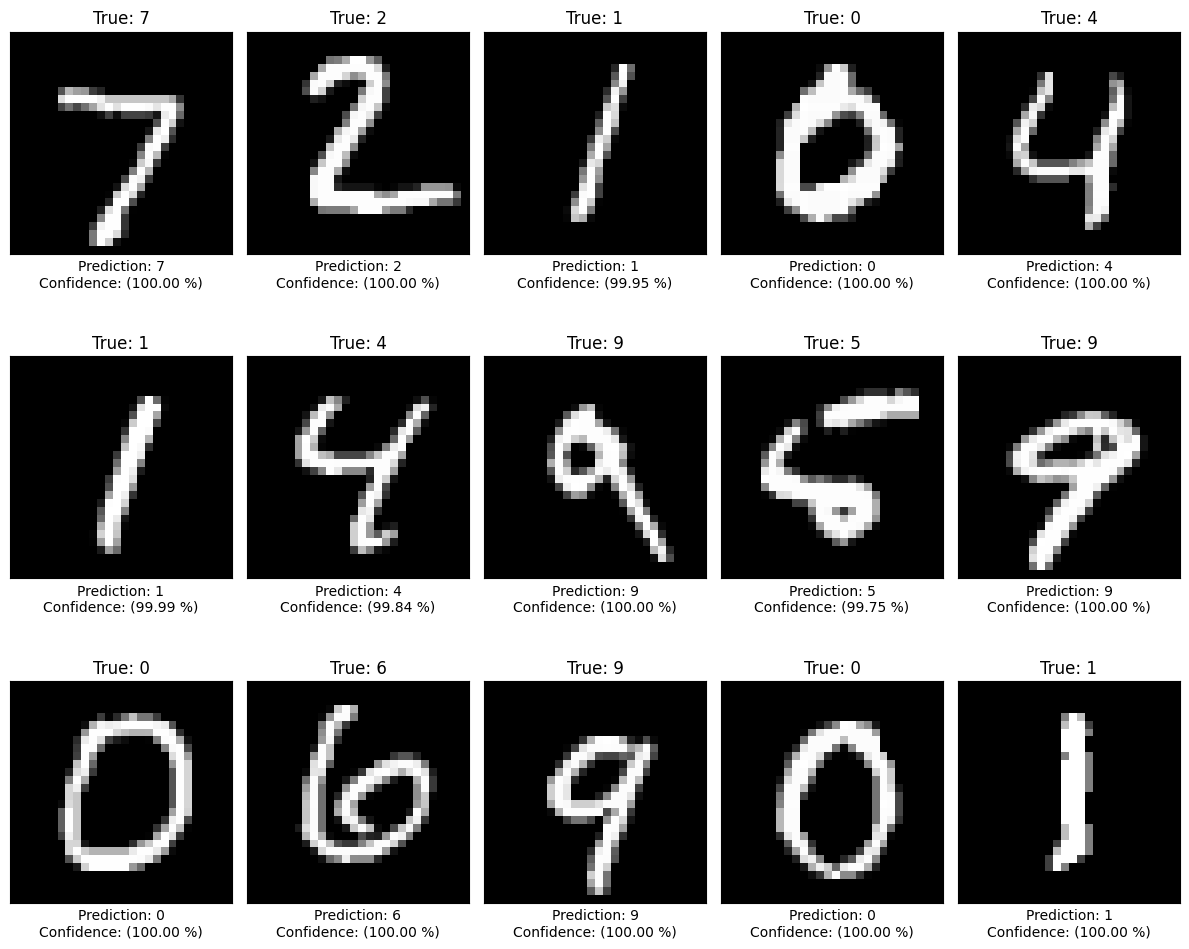

In [91]:
import matplotlib.pyplot as plt

def get_one_result(idx):
  img, y_true, y_pred, confidence=x_test[idx], y_test[idx], np.argmax(predictions[idx]), 100*np.max(predictions[idx])
  return img, y_true, y_pred, confidence

fig, axes=plt.subplots(3,5)
fig.set_size_inches(12, 10)
for i in range(15):
  ax=axes[i//5, i%5]
  img, y_true, y_pred, confidence=get_one_result(i)

  ax.imshow(img, cmap='gray')
  ax.set_xticks([])
  ax.set_yticks([])
  ax.set_title(f'True: {y_true}')
  ax.set_xlabel(f'Prediction: {y_pred}\nConfidence: ({confidence:.2f} %)')
plt.tight_layout()
plt.show()